In [3]:
from covariant_integrator_library import *
from bunch_inits import *
from plotting_variables import *

font_size = 16
# Update the rcParams dictionary to set the font size globally
plt.rcParams.update({'font.size': font_size})

E_MeV =  3000000.116293009
Gamma =  3196.979097828094
E_rest =  938.385948501337
E_MeV =  -2999995.2840211513
Gamma =  15.574482218882022
E_rest =  193020.75925874696
6e-08
114.89760938456277


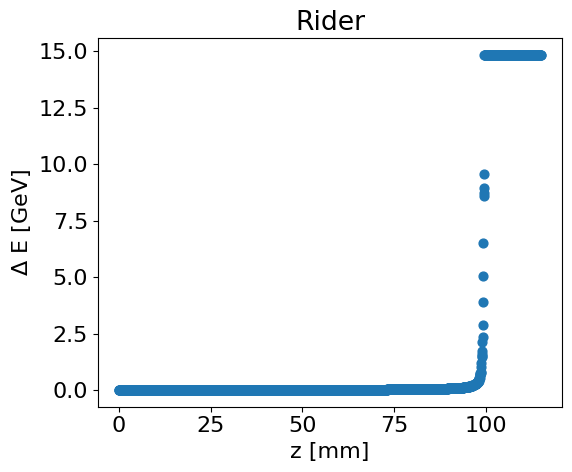

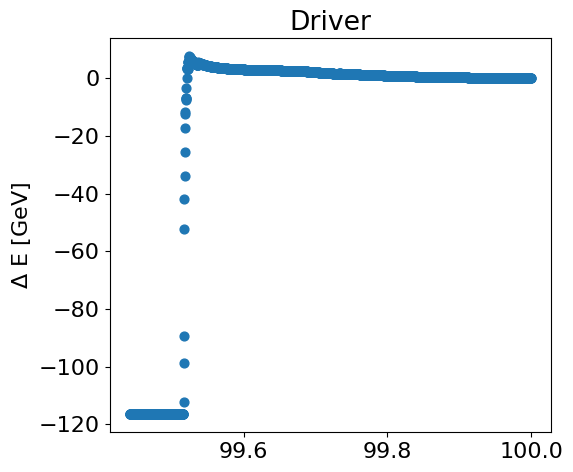

E_MeV =  2906896.489663958
Gamma =  3097.7623287820606
E_rest =  938.385948501337
E_MeV =  -2906847.058883825
Gamma =  15.092928417001879
E_rest =  193020.75925874696
6.999999999999999e-08
129.8869868241621


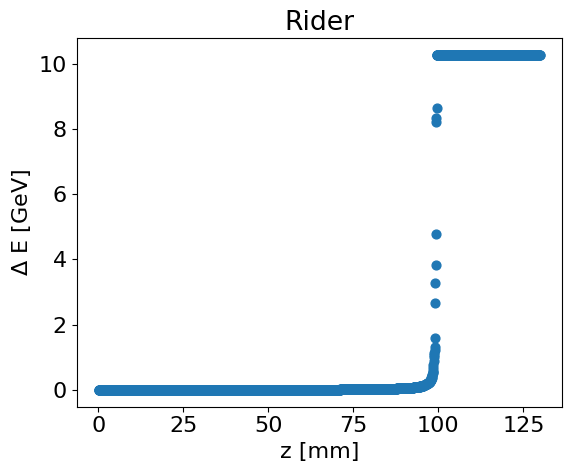

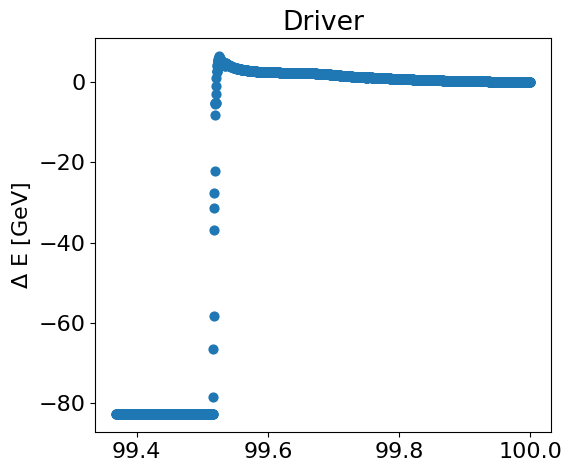

E_MeV =  2813793.088685701
Gamma =  2998.545800534439
E_rest =  938.385948501337
E_MeV =  -2813750.7666940647
Gamma =  14.611710843066717
E_rest =  193020.75925874696
8e-08
143.68778794129136


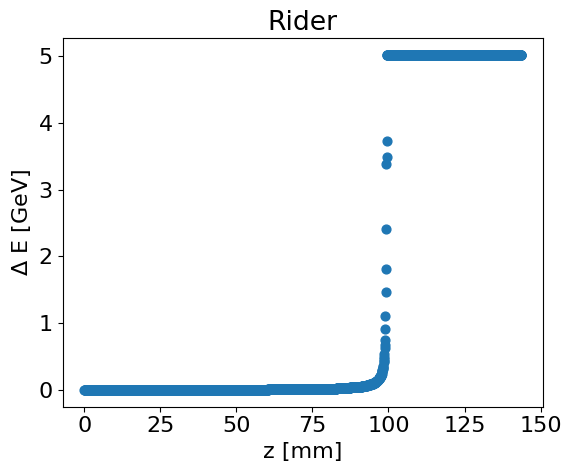

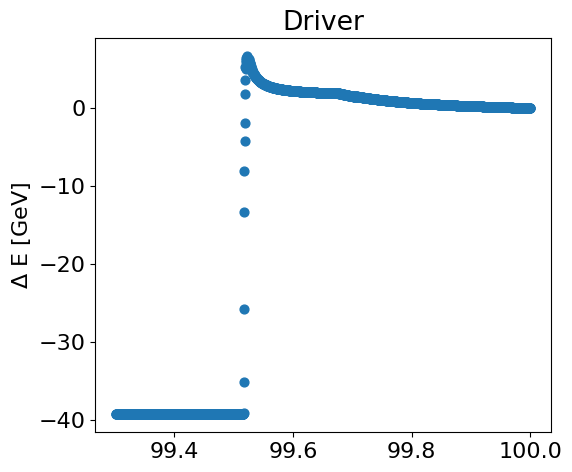

E_MeV =  2720689.6393584427
Gamma =  2899.3292211287658
E_rest =  938.385948501337
E_MeV =  -2720685.0760544743
Gamma =  14.130726060875004
E_rest =  193020.75925874696
9e-08
156.30000136202963


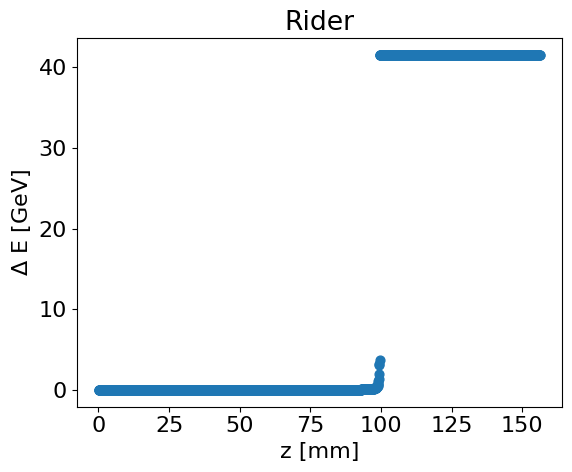

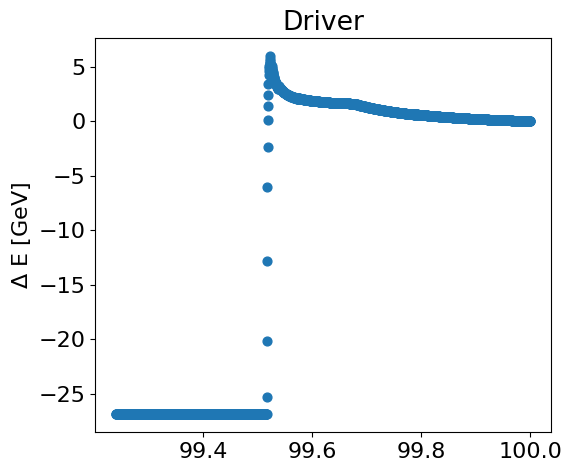

E_MeV =  2627586.1091437717
Gamma =  2800.112555929025
E_rest =  938.385948501337
E_MeV =  -2627526.788354155
Gamma =  13.649345327976116
E_rest =  193020.75925874696
1e-07
167.72362394876586


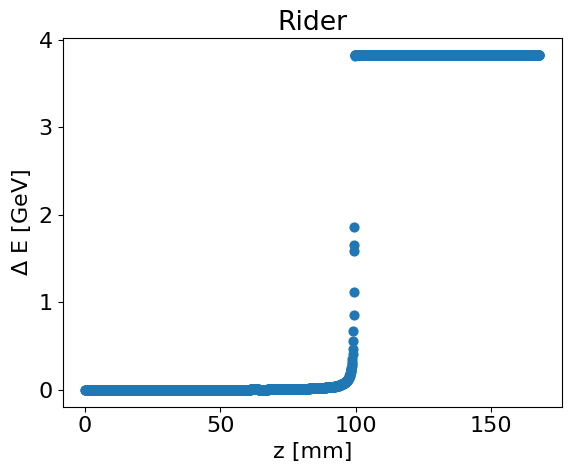

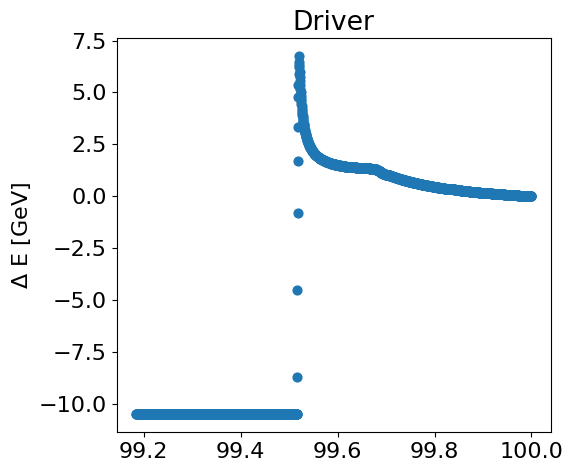

E_MeV =  2534482.8593040705
Gamma =  2700.896189962483
E_rest =  938.385948501337
E_MeV =  -2534424.9328690316
Gamma =  13.168347829031786
E_rest =  193020.75925874696
1.1e-07
177.95867965608008


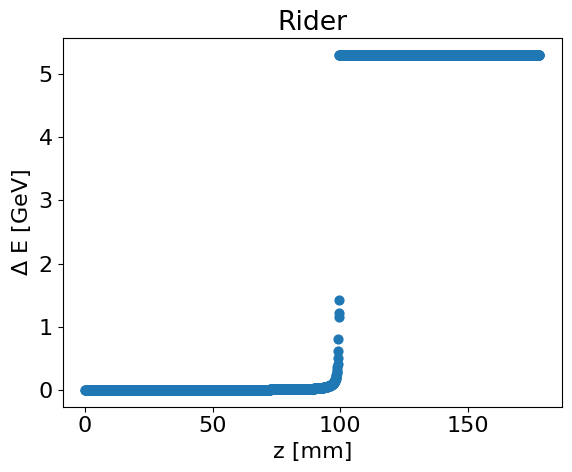

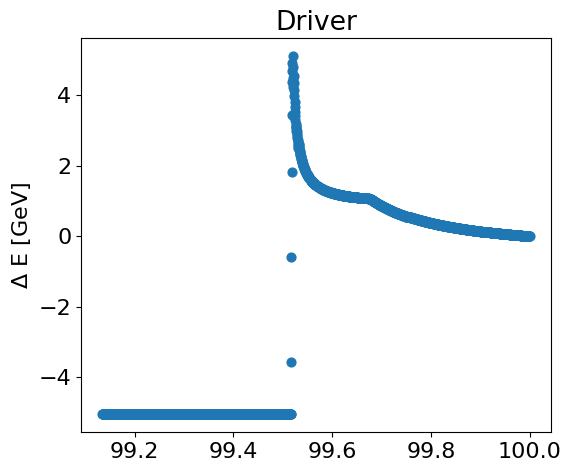

E_MeV =  2441379.357597969
Gamma =  2601.67955609241
E_rest =  938.385948501337
E_MeV =  -2441319.4135324657
Gamma =  12.687433429445953
E_rest =  193020.75925874696
1.2000000000000002e-07
187.00513303384537


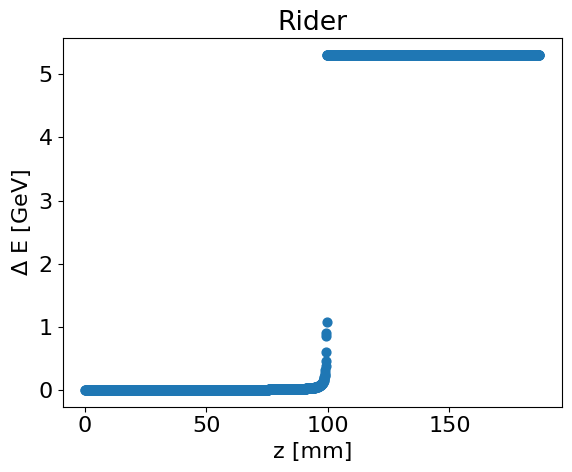

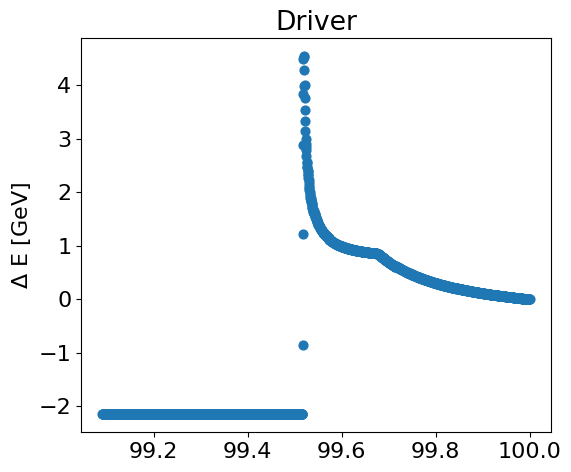

E_MeV =  2348275.979424673
Gamma =  2502.463054426058
E_rest =  938.385948501337
E_MeV =  -2348271.3186286245
Gamma =  12.206929623069641
E_rest =  193020.75925874696
1.3e-07
194.86301040229534


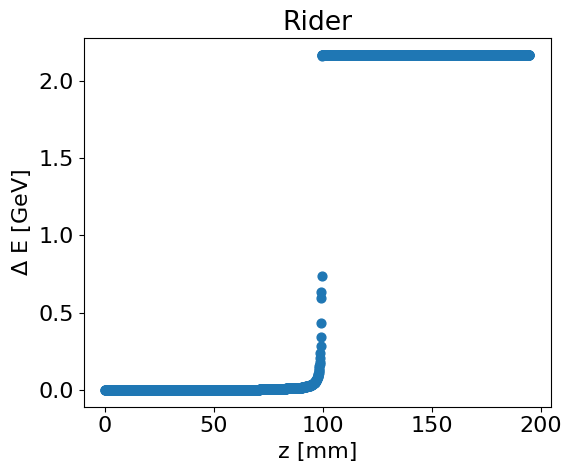

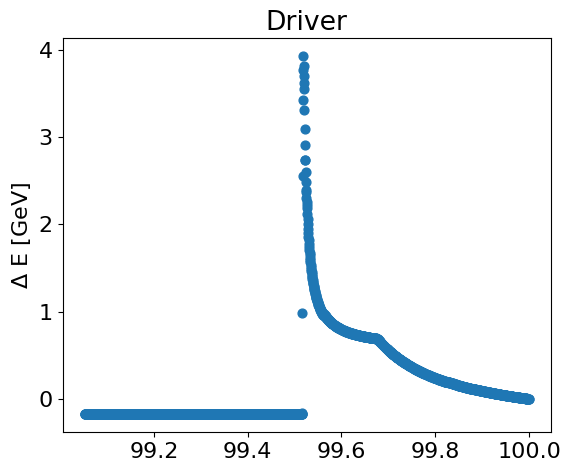

E_MeV =  2255172.293125495
Gamma =  2403.246225031568
E_rest =  938.385948501337
E_MeV =  -2255112.036825345
Gamma =  11.725979834874256
E_rest =  193020.75925874696
1.3999999999999998e-07
201.53227556625984


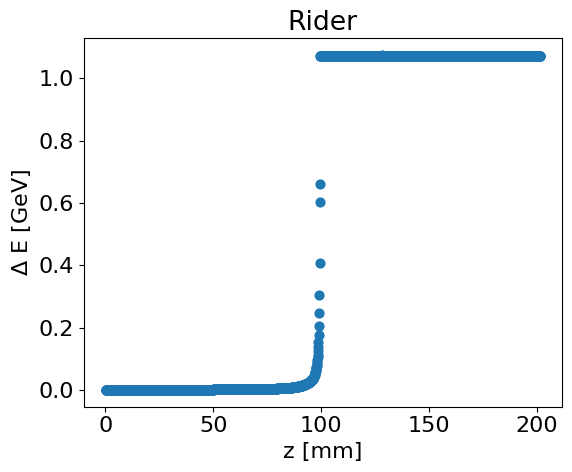

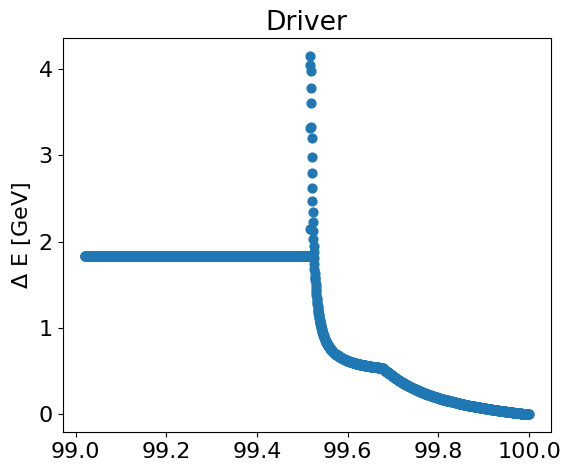

E_MeV =  2162069.007342094
Gamma =  2304.0298231609454
E_rest =  938.385948501337
E_MeV =  -2162055.386399643
Gamma =  11.24570437111985
E_rest =  193020.75925874696
1.5e-07
207.01299047492137


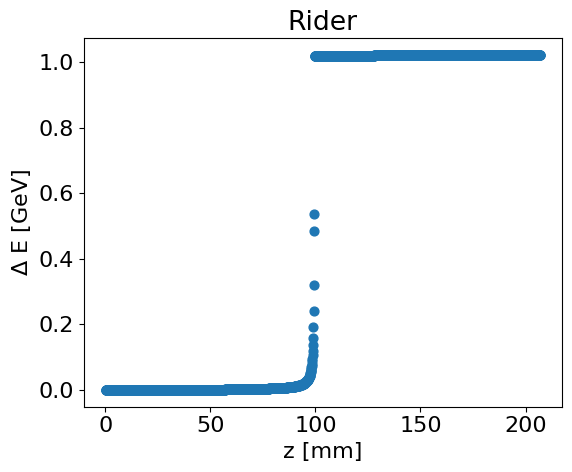

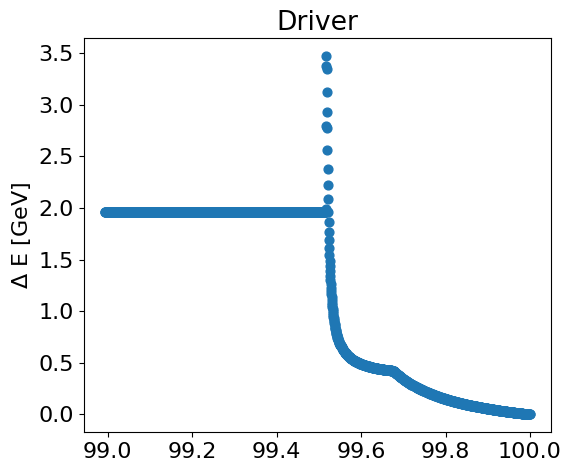

E_MeV =  2068965.628788839
Gamma =  2204.81332323557
E_rest =  938.385948501337
E_MeV =  -2068905.8140131403
Gamma =  10.765113305723139
E_rest =  193020.75925874696
1.6e-07
211.3051124120368


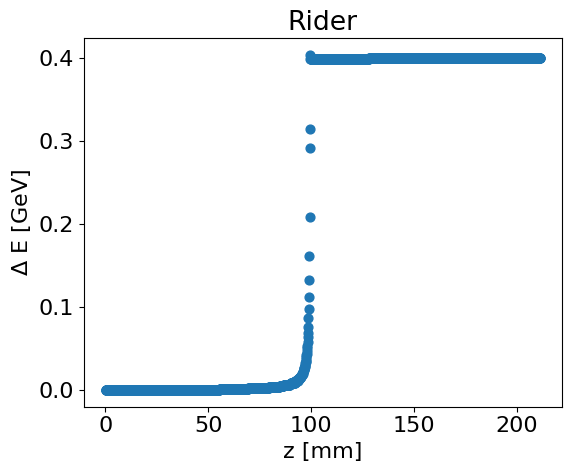

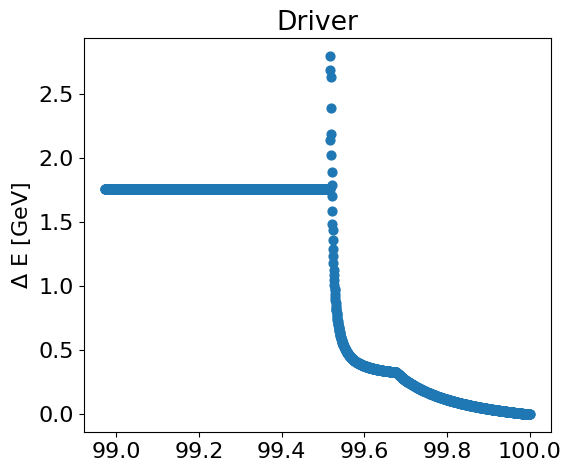

E_MeV =  1975862.041140092
Gamma =  2105.596601405907
E_rest =  938.385948501337
E_MeV =  -1975841.9747709737
Gamma =  10.285151353148146
E_rest =  193020.75925874696
1.7000000000000001e-07
214.40862698719977


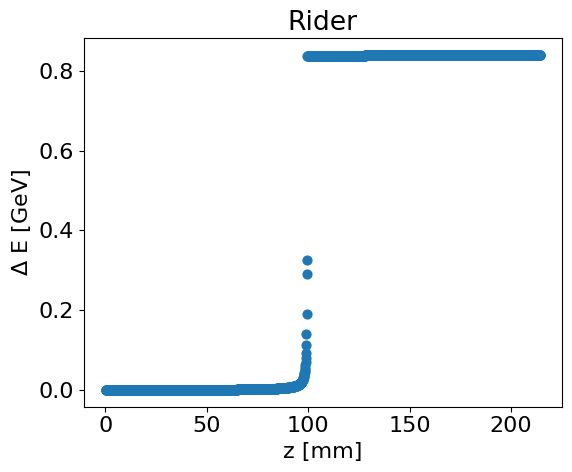

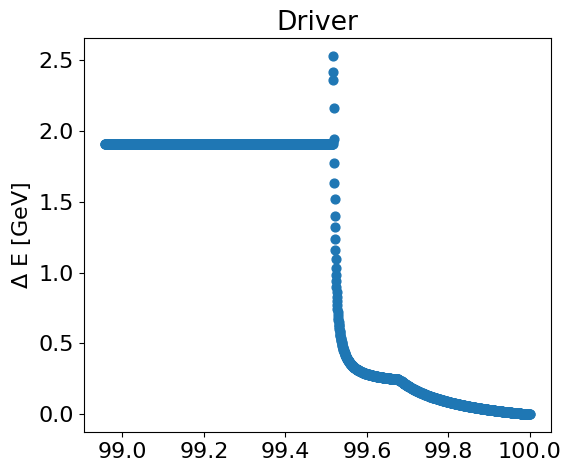

E_MeV =  1882758.55386338
Gamma =  2006.3799875954958
E_rest =  938.385948501337
E_MeV =  -1882732.7986906376
Gamma =  9.805169868927734
E_rest =  193020.75925874696
1.8e-07
216.32356575778462


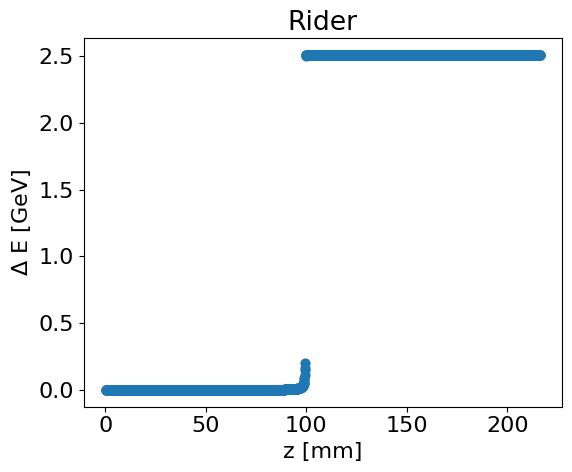

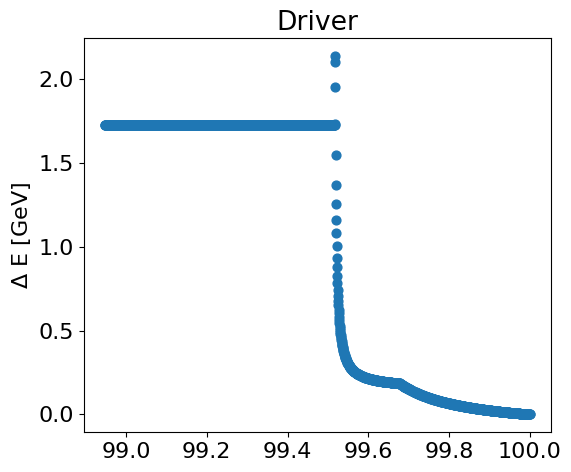

E_MeV =  1789655.219685948
Gamma =  1907.1635381585584
E_rest =  938.385948501337
E_MeV =  -1789612.9197405034
Gamma =  9.325380683906156
E_rest =  193020.75925874696
1.9e-07
217.0499370657453


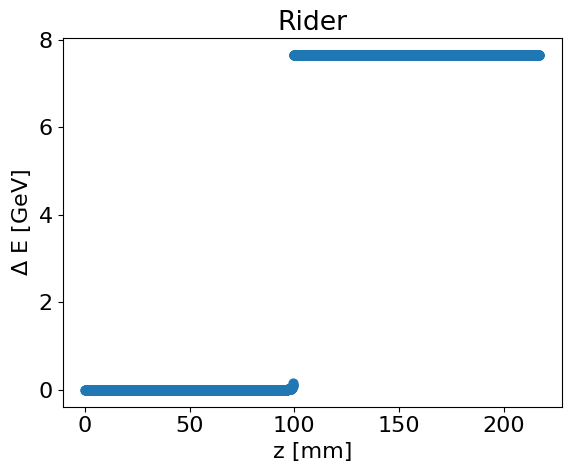

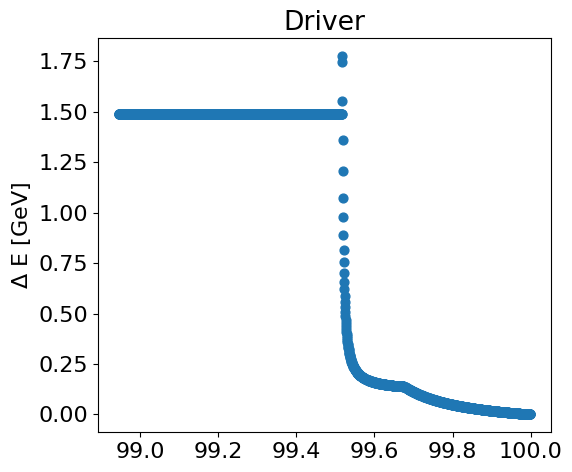

E_MeV =  1696551.7174169682
Gamma =  1807.9469110161976
E_rest =  938.385948501337
E_MeV =  -1696526.1635008943
Gamma =  8.8460497565261
E_rest =  193020.75925874696
2e-07
216.58770302983092


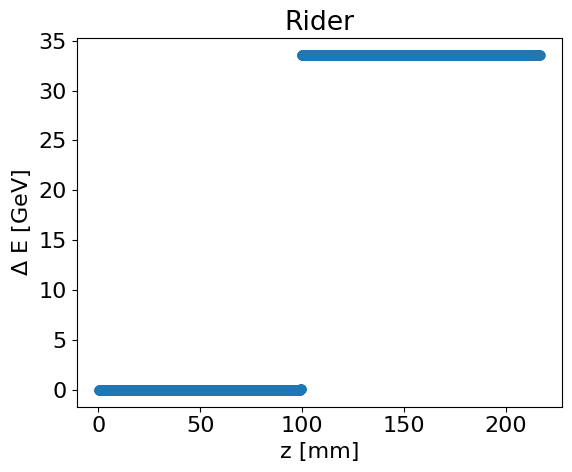

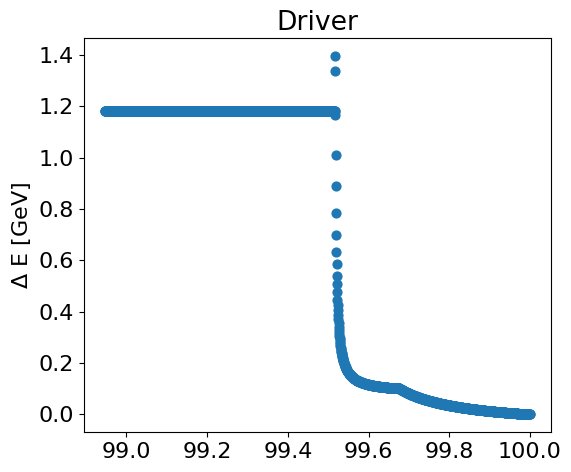

E_MeV =  1603448.1587506274
Gamma =  1708.730225444247
E_rest =  938.385948501337
E_MeV =  -1603406.2055914442
Gamma =  8.366885021508782
E_rest =  193020.75925874696
2.1e-07
214.93687459842496


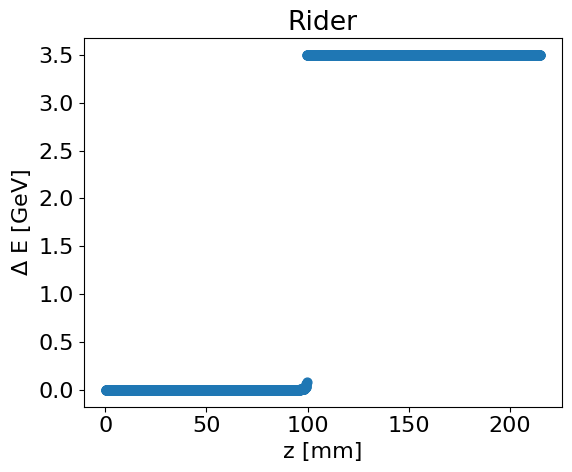

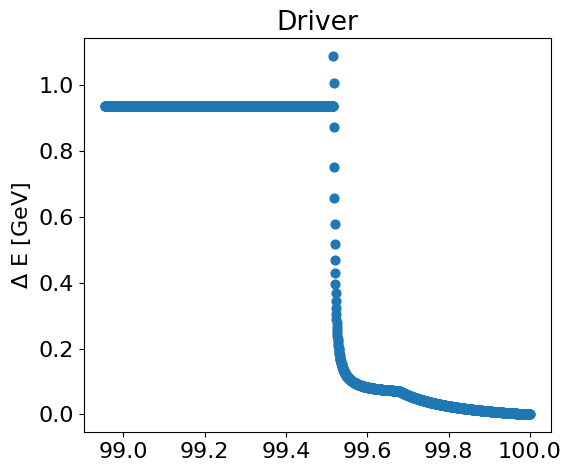

E_MeV =  1510344.6839556184
Gamma =  1609.5136312303443
E_rest =  938.385948501337
E_MeV =  -1510340.950530831
Gamma =  7.888400067456363
E_rest =  193020.75925874696
2.2e-07
212.09747122806377


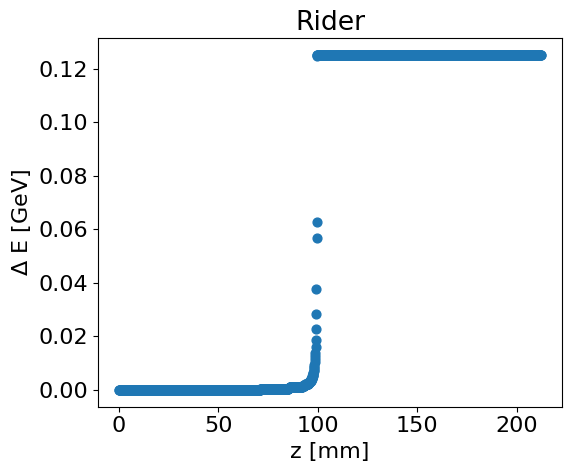

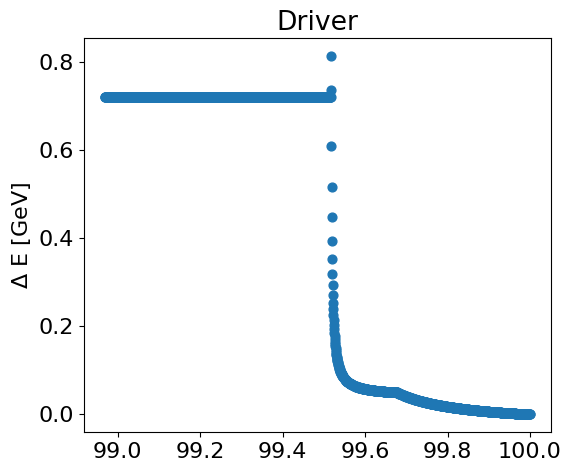

E_MeV =  1417241.2266871906
Gamma =  1510.2970580637523
E_rest =  938.385948501337
E_MeV =  -1417187.7010001147
Gamma =  7.409938730312116
E_rest =  193020.75925874696
2.3e-07
208.06948456467282


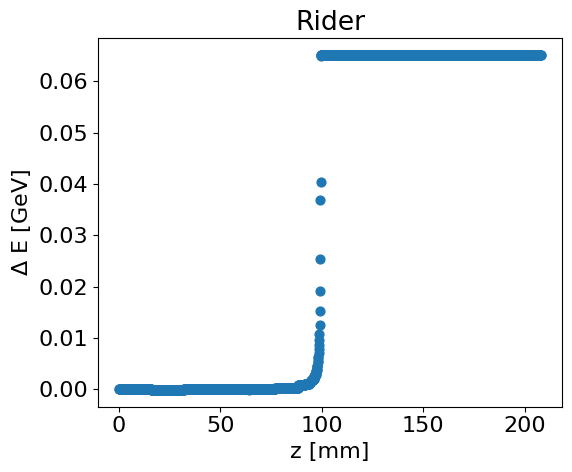

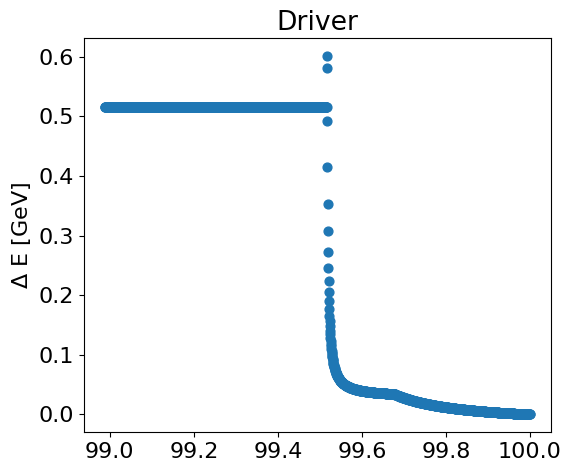

E_MeV =  1324138.0575736987
Gamma =  1411.080794842012
E_rest =  938.385948501337
E_MeV =  -1324084.2306216091
Gamma =  6.9323074324325145
E_rest =  193020.75925874696
2.4000000000000003e-07
202.85295636616993


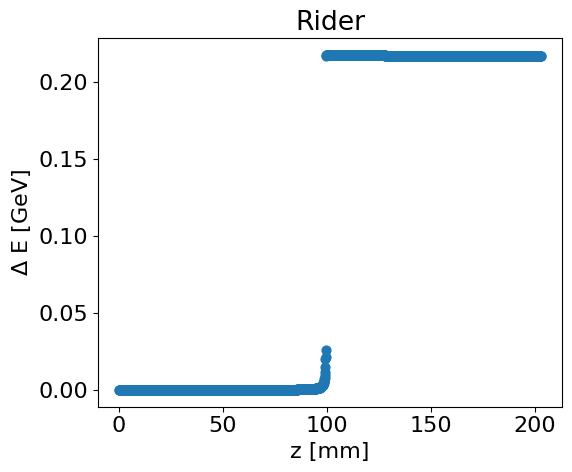

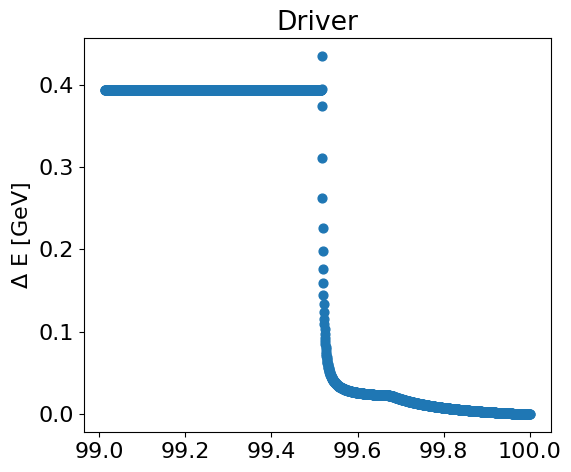

E_MeV =  1231034.6104982942
Gamma =  1311.8642389285487
E_rest =  938.385948501337
E_MeV =  -1231017.0393577458
Gamma =  6.455563506173908
E_rest =  193020.75925874696
2.5e-07
196.4478018044929


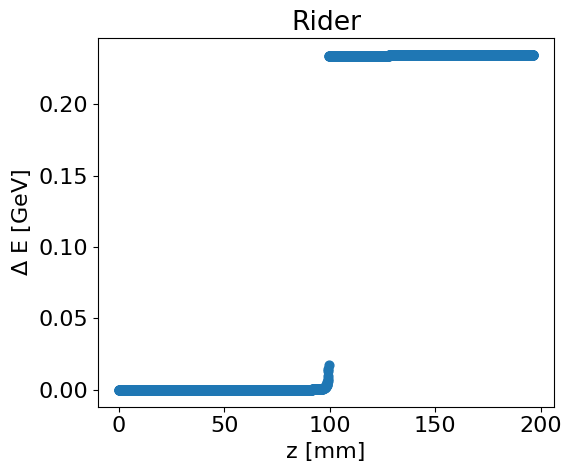

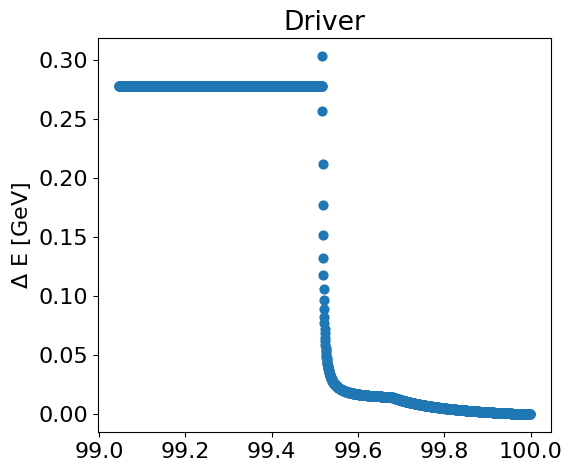

E_MeV =  1137931.0850582554
Gamma =  1212.6476038903263
E_rest =  938.385948501337
E_MeV =  -1137900.2288954721
Gamma =  5.97943497157906
E_rest =  193020.75925874696
2.6e-07
188.85404867825804


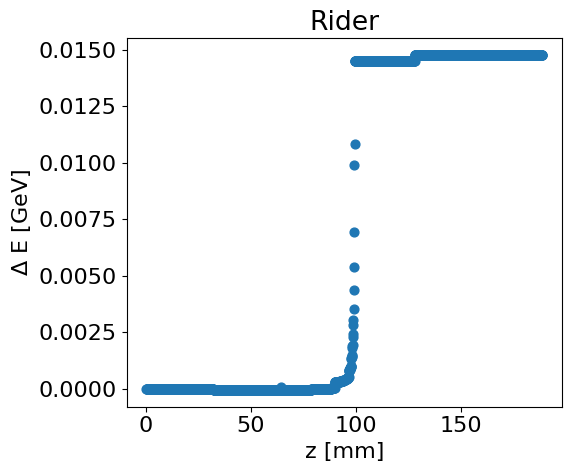

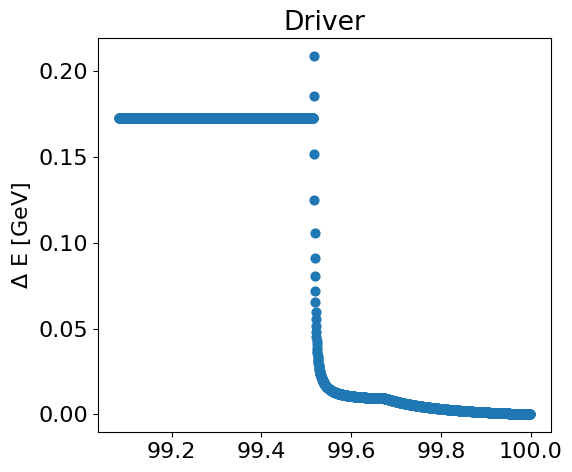

E_MeV =  1044827.6700940196
Gamma =  1113.4310921391952
E_rest =  938.385948501337
E_MeV =  -1044763.7076513722
Gamma =  5.504301497481356
E_rest =  193020.75925874696
2.7e-07
180.07172804505996


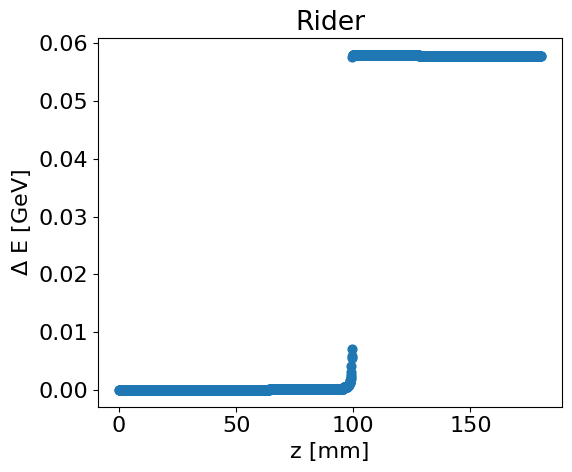

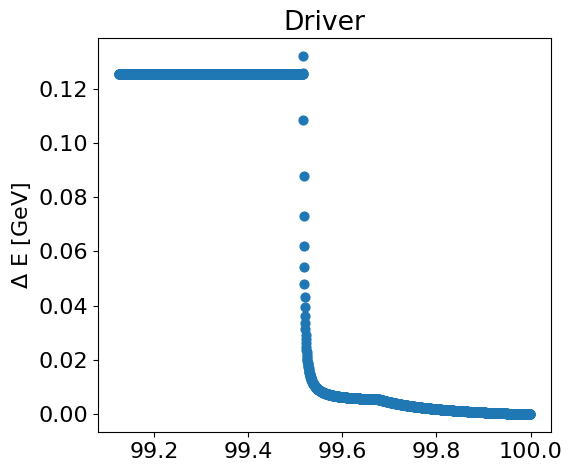

E_MeV =  951724.0653314341
Gamma =  1014.2143853162634
E_rest =  938.385948501337
E_MeV =  -951661.5077502456
Gamma =  5.030748774827561
E_rest =  193020.75925874696
2.7999999999999997e-07
170.10078834358126


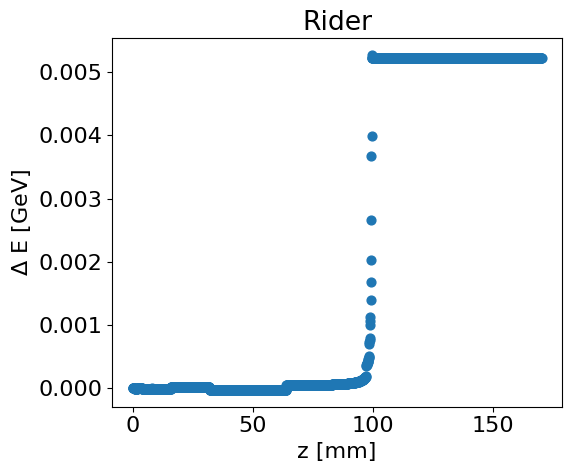

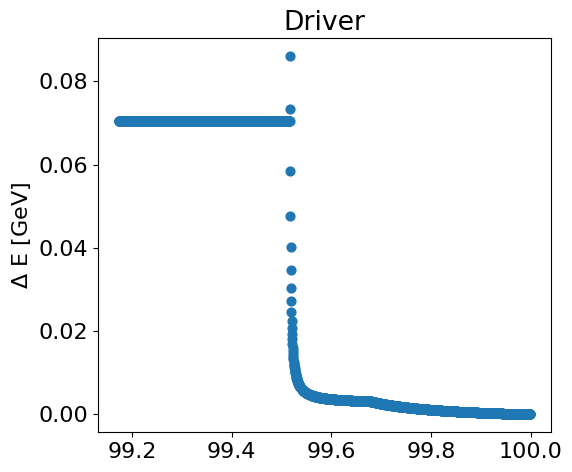

E_MeV =  858620.6474218167
Gamma =  914.9978871418887
E_rest =  938.385948501337
E_MeV =  -858608.7921039887
Gamma =  4.559289597333791
E_rest =  193020.75925874696
2.9000000000000003e-07
158.94129566612344


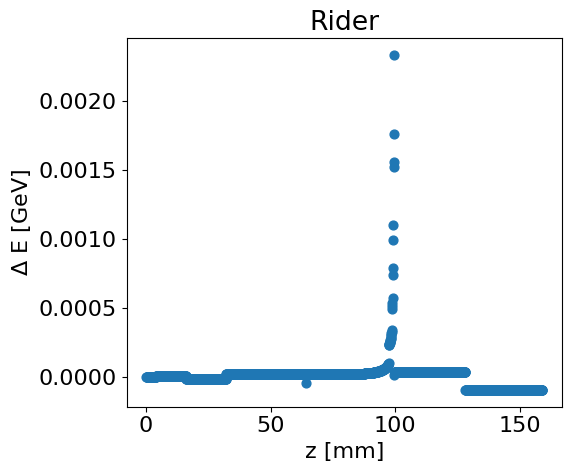

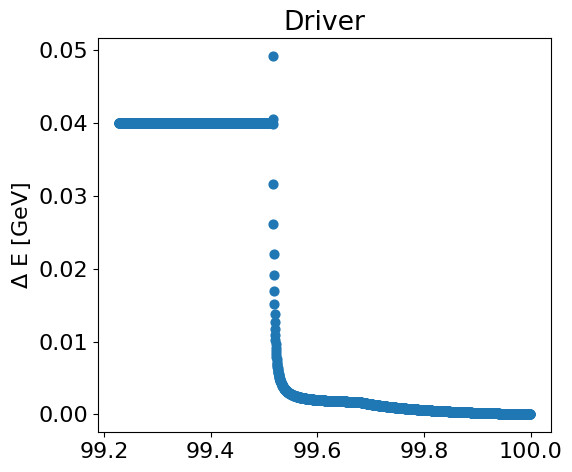

E_MeV =  765517.1548183942
Gamma =  815.7813223724346
E_rest =  938.385948501337
E_MeV =  -765516.3381904851
Gamma =  4.090109034092303
E_rest =  193020.75925874696
3e-07
146.59320350504393


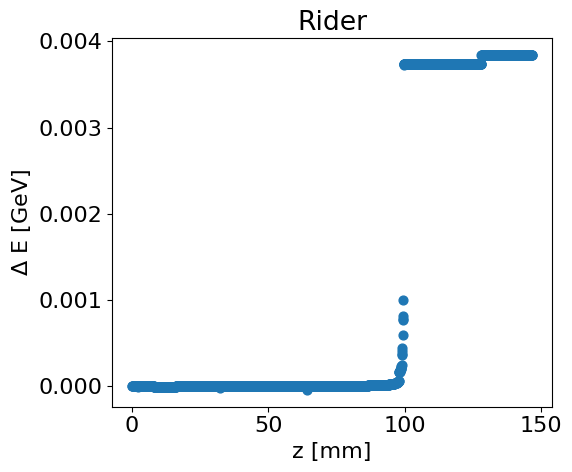

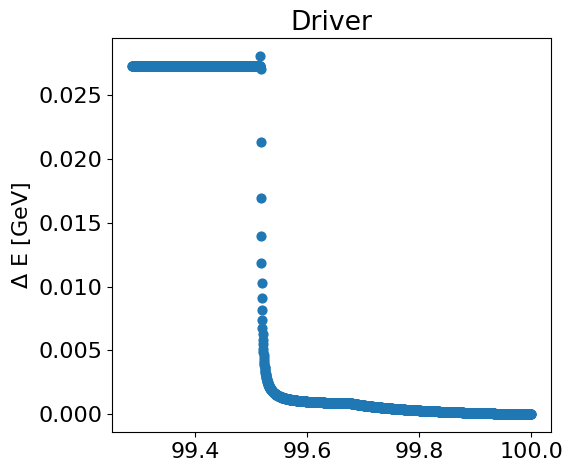

E_MeV =  672413.867286936
Gamma =  716.5649945439909
E_rest =  938.385948501337
E_MeV =  -672376.0230544283
Gamma =  3.6241339148845166
E_rest =  193020.75925874696
3.1e-07
133.0565657887049


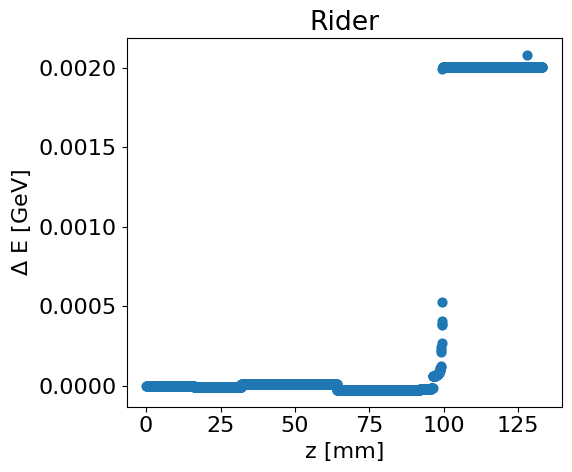

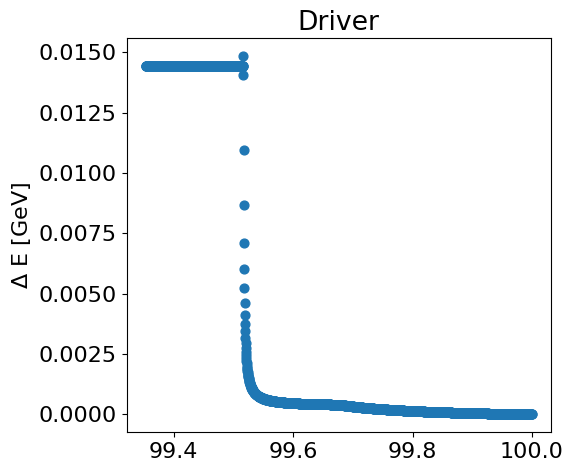

E_MeV =  579310.3130087232
Gamma =  617.3484097323429
E_rest =  938.385948501337
E_MeV =  -579252.3780684996
Gamma =  3.1632120049109345
E_rest =  193020.75925874696
3.2e-07
118.33129007042506


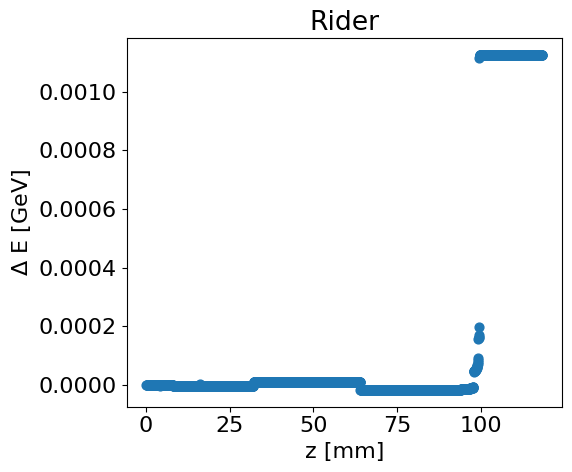

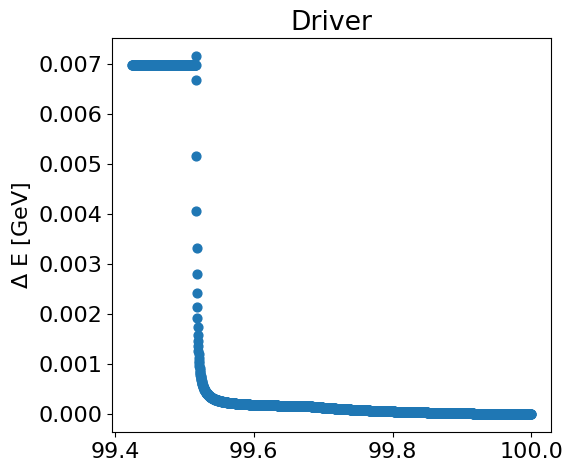

E_MeV =  486206.9453303689
Gamma =  518.1320667202938
E_rest =  938.385948501337
E_MeV =  -486181.164882385
Gamma =  2.7100490539938775
E_rest =  193020.75925874696
3.3e-07
102.41746673677143


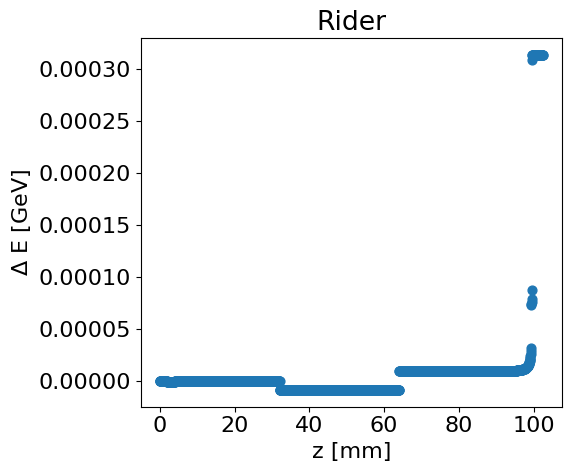

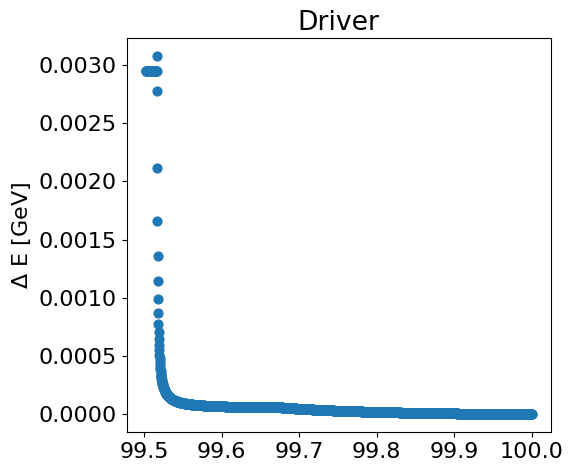

E_MeV =  393103.5037851477
Gamma =  418.91571845480934
E_rest =  938.385948501337
E_MeV =  -393041.92457293783
Gamma =  2.2685647165434233
E_rest =  193020.75925874696
3.4000000000000003e-07
85.31504283276989


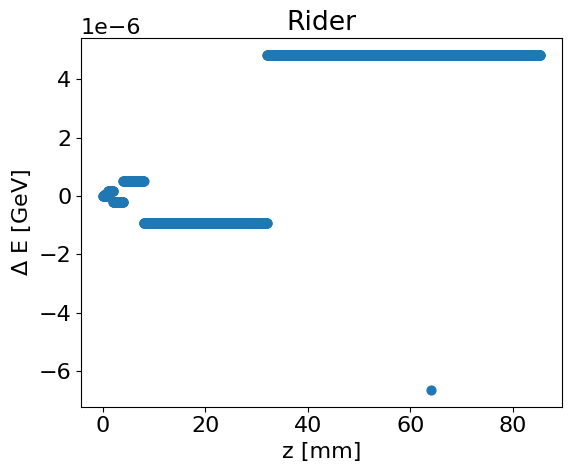

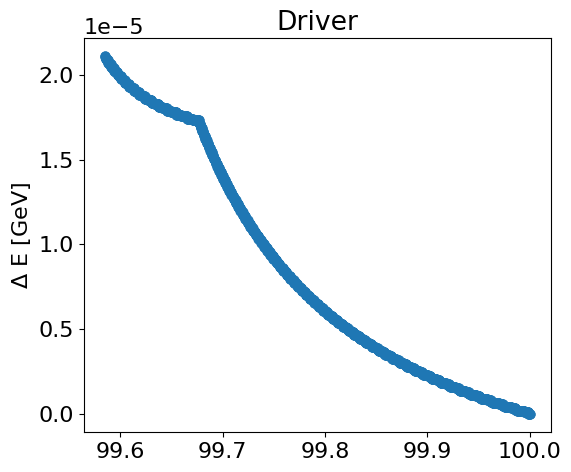

E_MeV =  299999.89162388124
Gamma =  319.6993302314366
E_rest =  938.385948501337
E_MeV =  -299980.2412230184
Gamma =  1.848062327640856
E_rest =  193020.75925874696
3.5e-07
67.0239953291239


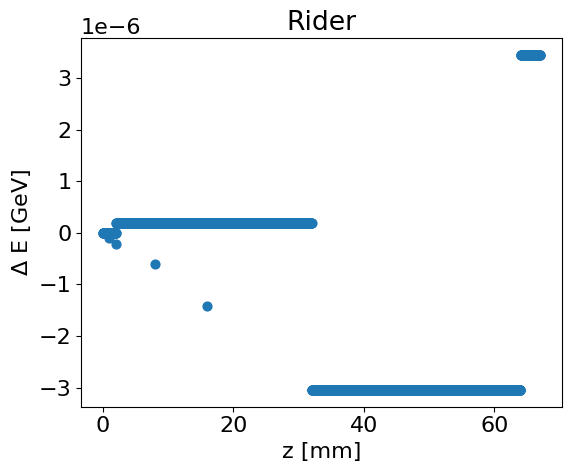

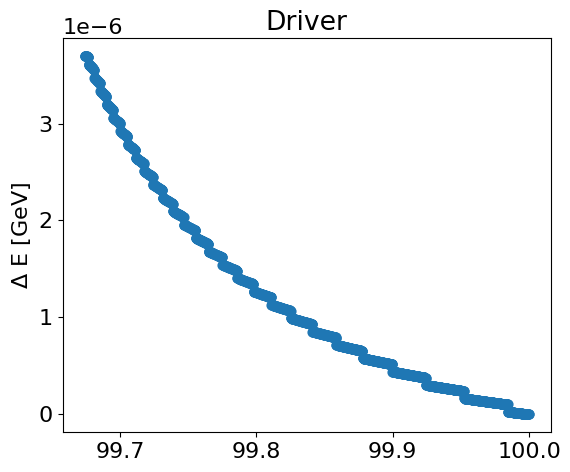

In [4]:
c_ms = 299792458

transv_dist = 1e-4

m_particle_rider = 1.007319468  #proton -amu
m_particle_driver = 207.2 #lead, amu
#m_particle = 0.0005485   #electron -amu
#m_particle_driver = 315 #gold hexafloride, amu

stripped_ions_rider = 1.
stripped_ions_driver = 54.
charge_sign_rider= -1.
charge_sign_driver = 1.
Pz_list = np.linspace(9.584295e4,9.584300885e5,30)
max_dE_MeVs_rider = []
max_dE_MeVs_driver = []
fracs_E_rider = []
fracs_E_driver = []
        
for i in range(0,len(Pz_list)):
        Pz_list = np.linspace(9.584300885e5,9.584295e4,30)
        starting_Pz_rider = Pz_list[i]   #3.25E5 corresponds to 1 TeV
        
        starting_Pz_driver = -starting_Pz_rider/m_particle_driver*m_particle_rider  #actually velocity-like, mass factored later
        transv_mom_rider = 1e-6   #1e-2 is roughly 10keV scale
        transv_mom_driver = transv_mom_rider#*207 # lazy adding lead mass
        starting_distance_rider = 1e-3
        starting_distance_driver = 100.

        sim_type = 2    # type 2 used here, it is for bunch--bunch simulations
        pcount_rider = 1    #bunch counts
        pcount_driver = 1



        init_rider, E_MeV_rest_rider = init_bunch(starting_distance_rider,transv_mom_rider,starting_Pz_rider,stripped_ions_rider,m_particle_rider,transv_dist,pcount_rider,charge_sign_rider)

        init_driver, E_MeV_rest_driver = init_bunch(starting_distance_driver,transv_mom_driver,starting_Pz_driver,stripped_ions_driver,m_particle_driver,-transv_dist,pcount_driver,charge_sign_driver)


        #### parameters not used in this test, but required to run integrator
        bunch_dist = 1E5   #bunch--bunch distance at which the driver bunch has maximum charge (gaussian mean)
        cav_spacing = 1E5  #distance to the subsequent driver bunch
        aperture = 1E5 #this parameter reused for bunch-driven gaussian sigma
        z_cutoff = 0
        wall_pos= 1E5


        #coarse initialization
        # static_steps = 1#set init_steps equal to tot_steps to test static integrator only
        # ret_steps = 25
        # step_size = 2e-6

        #interaction zone
        static_steps = 1
        ret_steps = 2000
        #step_size = 1e-7 #+ 2.3e-6 / ( (i+1) / (25) )
        step_size = 5e-8 + (i+1)*1.2e-8 
        print(step_size)
        
        retarded_traj,retarded_drv_traj = retarded_integrator3(static_steps,ret_steps,step_size,wall_pos,aperture,sim_type,init_rider,init_driver,bunch_dist,cav_spacing,z_cutoff)#just use retarded_intergrator2 for retarded calcs
        #retarded_traj,retarded_drv_traj = retarded_integrator3(static_steps,ret_steps,step_size,wall_pos,aperture,sim_type,retarded_traj_pre[-1],retarded_drv_traj_pre[-1],bunch_dist,cav_spacing,z_cutoff)#just use retarded_intergrator2 for retarded calcs
        #retarded_traj,retarded_drv_traj = retarded_traj2,retarded_drv_traj2

        delta_e, delta_e_drv, tot_e, tot_e_drv, delta_e_keV, delta_e_MeV, tot_e_GeV, delta_e_keV_drv, delta_e_MeV_drv, tot_e_GeV_drv, zs, xs, zs_drv, xs_drv, bzs, bxs, bys, bdotxs, bdotys, bdotzs, Pzs, Pxs, Pys, Pts, gammas, tees, bzs_drv, bxs_drv, bys_drv, bdotxs_drv, bdotys_drv, bdotzs_drv, Pzs_drv, Pxs_drv, Pys_drv, Pts_drv, gammas_drv, tees_drv, qs_drv, gam_fixed, bdotzs_seconds, q_statC_squared, q_kg_m3_sneg2, Pows_z_rider_watts = calculate_plotting_variables(retarded_traj,
        retarded_drv_traj, init_rider, init_driver, static_steps, ret_steps, E_MeV_rest_rider, E_MeV_rest_driver, c_ms)
        max_dE_MeVs_rider = np.append(max_dE_MeVs_rider,np.max(delta_e_MeV))
        max_dE_MeVs_driver = np.append(max_dE_MeVs_driver,np.max(delta_e_MeV_drv))
        print(zs[-1])
        frac_E_rider = np.divide(np.max(tot_e),tot_e[0])
        frac_E_driver = np.divide(np.max(tot_e_drv),tot_e_drv[0])
        fracs_E_rider = np.append(fracs_E_rider,frac_E_rider)
        fracs_E_driver = np.append(fracs_E_driver,frac_E_driver)

        fig = plt.figure(figsize=(6,5))
        ax = fig.add_subplot(1, 1, 1) 
        ax.scatter(zs,delta_e_MeV/1000,s=40)
        #ax.scatter(zs_drv,delta_e_MeV_drv,s=40)
        #ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
        ax.set_ylabel(r"$\Delta$ E [GeV]")
        ax.set_xlabel(r"z [mm]")
        #ax.axvline(30,color='g',label="wall paosition")
        #plt.xlim(starting_distance_rider/2,3)
        #plt.ylim(1E-2,2e3)
        #plt.xscale('log')  #log scale works at 1mm range
        #plt.yscale('log')
        plt.title("Rider")
        plt.tight_layout()
        #plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
        plt.show()

        fig = plt.figure(figsize=(6,5))
        ax = fig.add_subplot(1, 1, 1) 
        #ax.scatter(zs,delta_e_MeV,s=40)
        ax.scatter(zs_drv,delta_e_MeV_drv/1000,s=40)
        #ax.scatter(zs_drv,np.abs(delta_e_MeV_drv/1000),s=40)  #for log plotting
        #ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
        ax.set_ylabel(r"$\Delta$ E [GeV]")
        #ax.set_xlabel(r"z [mm]")
        #ax.axvline(30,color='g',label="wall paosition")
        #plt.xlim(-0.54,0.01)
        #plt.ylim(1E-5,5e3)
        #plt.xscale('log')
        #plt.yscale('log')
        plt.title("Driver")
        plt.tight_layout()
        #plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
        plt.show()





In [5]:
amu_kg = 1.66053907E-27
c_ms = 299792458 # Speed of light in m/s
mass_kg = m_particle_driver*amu_kg
vz_mmns = Pz_list/(m_particle_driver*gammas_drv[0]) #NOT mass_kg here
vz_ms = vz_mmns*1e6
Pz_kgms  = vz_ms*mass_kg*gammas_drv[0]
E_J     = Pz_kgms*c_ms
E_MeV = E_J*6.242E12

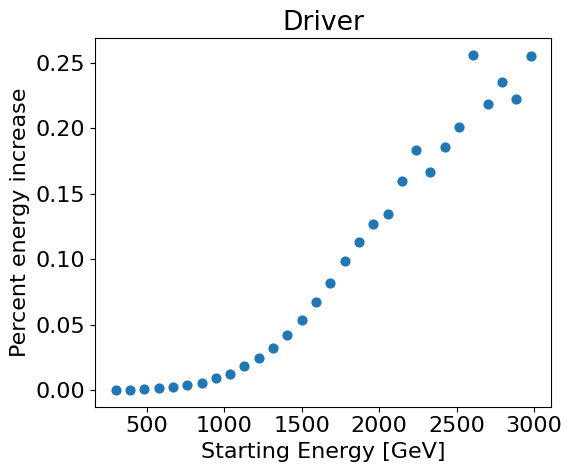

In [6]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
#ax.scatter(zs,delta_e_MeV,s=40)
ax.scatter(E_MeV/1000,(fracs_E_driver-1)*100,s=40)
#ax.scatter(zs_drv,np.abs(delta_e_MeV_drv/1000),s=40)  #for log plotting
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"Percent energy increase")
ax.set_xlabel(r"Starting Energy [GeV]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-0.54,0.01)
#plt.ylim(1E-5,5e3)
#plt.xscale('log')
#plt.yscale('log')
plt.title("Driver")
plt.tight_layout()
#plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
plt.show()

In [7]:
fracs_E_driver

array([1.00255213, 1.00222127, 1.00235244, 1.00218192, 1.00255951,
       1.00200987, 1.00185369, 1.00166728, 1.00183149, 1.00159838,
       1.00134394, 1.00127151, 1.00113007, 1.00098662, 1.00081691,
       1.00067347, 1.00053413, 1.00042024, 1.00032455, 1.00024317,
       1.00018092, 1.00012415, 1.00008859, 1.00005587, 1.00003549,
       1.00002122, 1.00001171, 1.00000588, 1.00000005, 1.00000001])

In [8]:
fracs_E_rider

array([1.00494576, 1.00352956, 1.00178276, 1.01526134, 1.00145647,
       1.0020919 , 1.00217311, 1.00092186, 1.00047637, 1.00047257,
       1.00019528, 1.00042498, 1.00133224, 1.00427217, 1.01977476,
       1.00218153, 1.00008278, 1.00004595, 1.00016405, 1.00019039,
       1.00001297, 1.00005548, 1.00000554, 1.00000272, 1.00000502,
       1.00000309, 1.00000194, 1.00000065, 1.00000001, 1.00000001])

In [9]:
np.append(max_dE_MeVs_driver,1)

array([7.67309607e+03, 6.47195311e+03, 6.63548555e+03, 5.95189672e+03,
       6.74388430e+03, 5.10909514e+03, 4.53999113e+03, 3.92878409e+03,
       4.14558729e+03, 3.46973972e+03, 2.79274149e+03, 2.52439662e+03,
       2.13887834e+03, 1.77598966e+03, 1.39490841e+03, 1.08767858e+03,
       8.13302994e+02, 6.01077811e+02, 4.34285585e+02, 3.03009255e+02,
       2.08812706e+02, 1.31900252e+02, 8.60233510e+01, 4.91697065e+01,
       2.80146177e+01, 1.48413960e+01, 7.15122905e+00, 3.07381184e+00,
       2.11065921e-02, 3.69607766e-03, 1.00000000e+00])

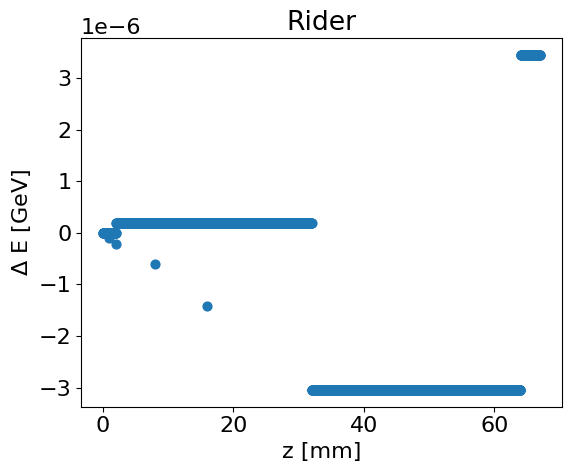

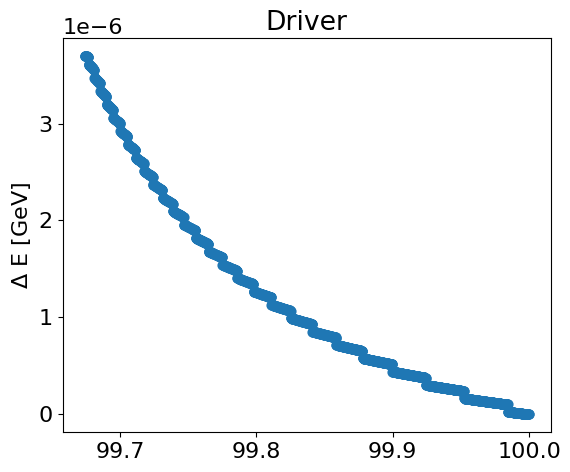

In [10]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs,delta_e_MeV/1000,s=40)
#ax.scatter(zs_drv,delta_e_MeV_drv,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"$\Delta$ E [GeV]")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(starting_distance_rider/2,3)
#plt.ylim(1E-2,2e3)
#plt.xscale('log')  #log scale works at 1mm range
#plt.yscale('log')
plt.title("Rider")
plt.tight_layout()
#plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
plt.show()

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
#ax.scatter(zs,delta_e_MeV,s=40)
ax.scatter(zs_drv,delta_e_MeV_drv/1000,s=40)
#ax.scatter(zs_drv,np.abs(delta_e_MeV_drv/1000),s=40)  #for log plotting
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"$\Delta$ E [GeV]")
#ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-0.54,0.01)
#plt.ylim(1E-5,5e3)
#plt.xscale('log')
#plt.yscale('log')
plt.title("Driver")
plt.tight_layout()
#plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
plt.show()



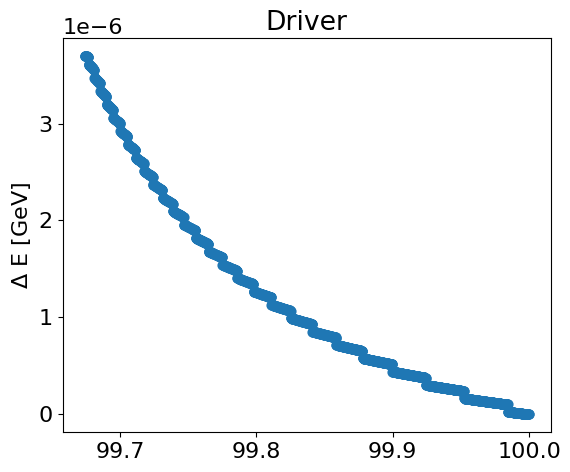

In [11]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
#ax.scatter(zs,delta_e_MeV,s=40)
ax.scatter(zs_drv,delta_e_MeV_drv/1000,s=40)
#ax.scatter(zs_drv,np.abs(delta_e_MeV_drv/1000),s=40)  #for log plotting
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"$\Delta$ E [GeV]")
#ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-0.54,0.01)
#plt.ylim(1E-5,5e3)
#plt.xscale('log')
#plt.yscale('log')
plt.title("Driver")
plt.tight_layout()
#plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
plt.show()



In [12]:
10/3000*100

0.33333333333333337

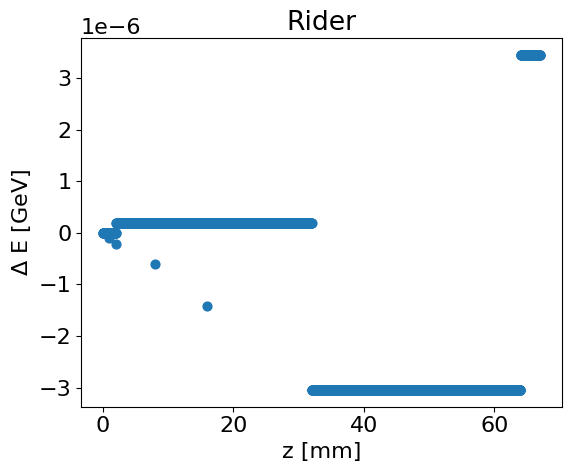

In [13]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs,delta_e_MeV/1000,s=40)
#ax.scatter(zs_drv,delta_e_MeV_drv,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"$\Delta$ E [GeV]")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(starting_distance_rider/2,3)
#plt.ylim(1E-2,2e3)
#plt.xscale('log')  #log scale works at 1mm range
#plt.yscale('log')
plt.title("Rider")
plt.tight_layout()
#plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
plt.show()

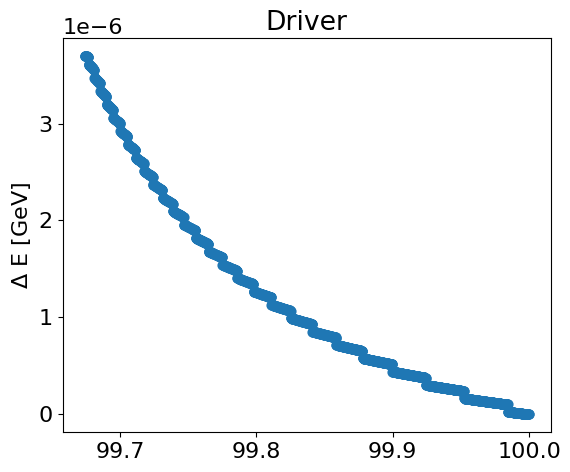

In [14]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
#ax.scatter(zs,delta_e_MeV,s=40)
ax.scatter(zs_drv,delta_e_MeV_drv/1000,s=40)
#ax.scatter(zs_drv,np.abs(delta_e_MeV_drv/1000),s=40)  #for log plotting
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"$\Delta$ E [GeV]")
#ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-0.54,0.01)
#plt.ylim(1E-5,5e3)
#plt.xscale('log')
#plt.yscale('log')
plt.title("Driver")
plt.tight_layout()
#plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
plt.show()



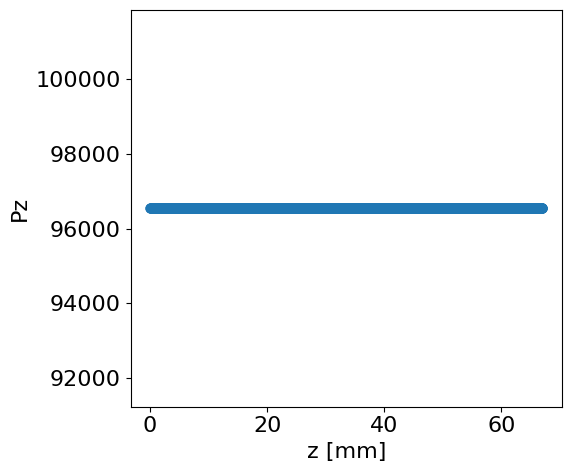

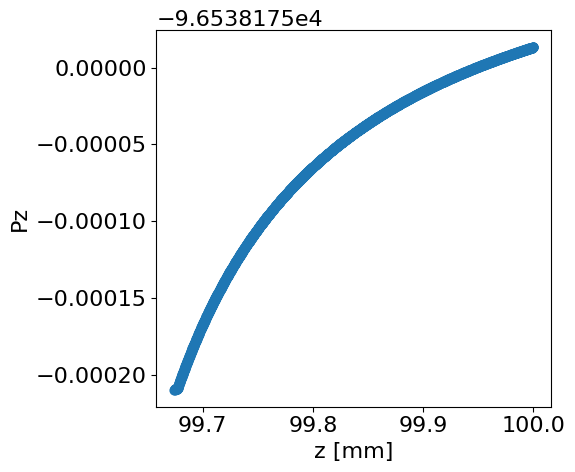

In [15]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs,Pzs,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"Pz")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()


fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs_drv,Pzs_drv,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"Pz")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()

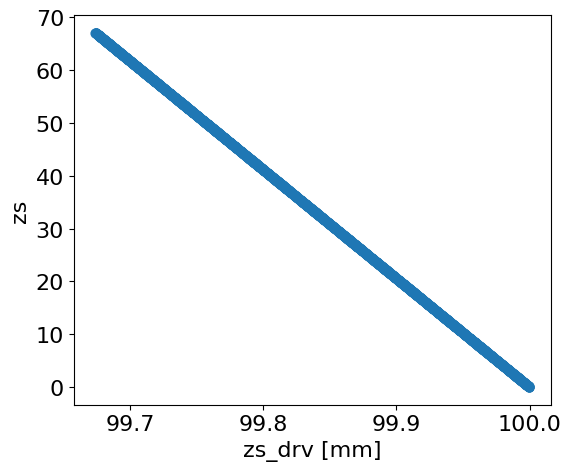

In [16]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs_drv,zs,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"zs")
ax.set_xlabel(r"zs_drv [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.ylim(2E-2,5)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
plt.show()

### Various other plots

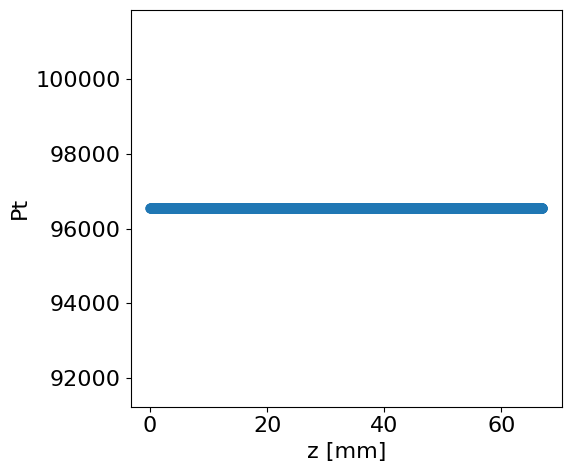

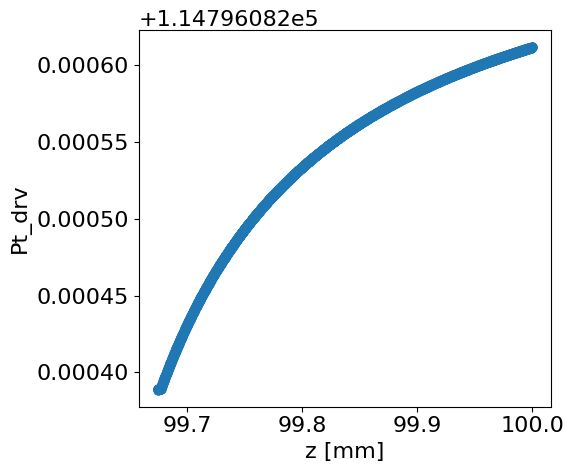

In [17]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs,Pts,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"Pt")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()


fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs_drv,Pts_drv,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"Pt_drv")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()

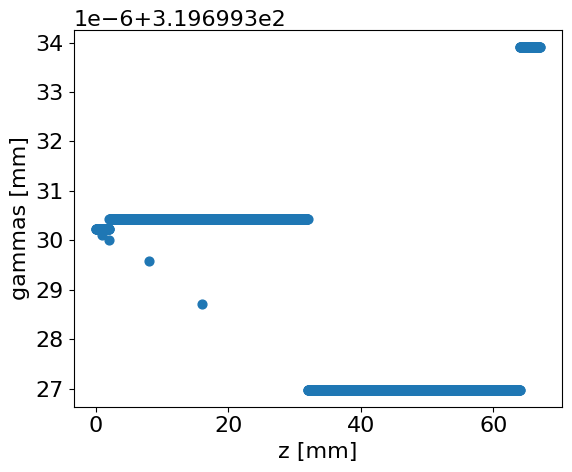

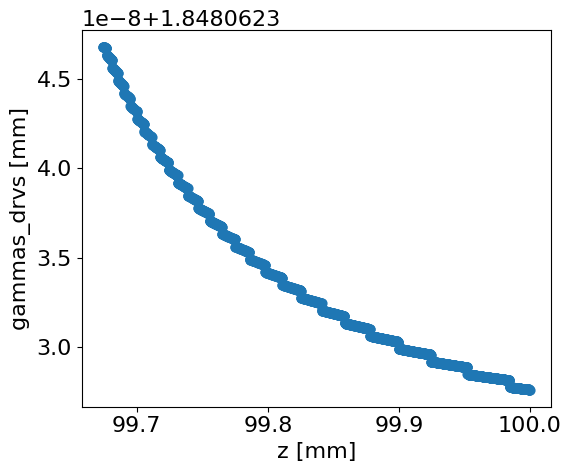

In [18]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs,gammas,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"gammas [mm]")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()


fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs_drv,gammas_drv,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"gammas_drvs [mm]")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()

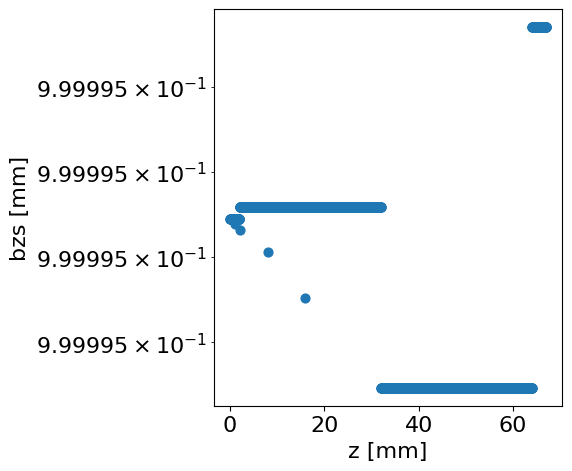

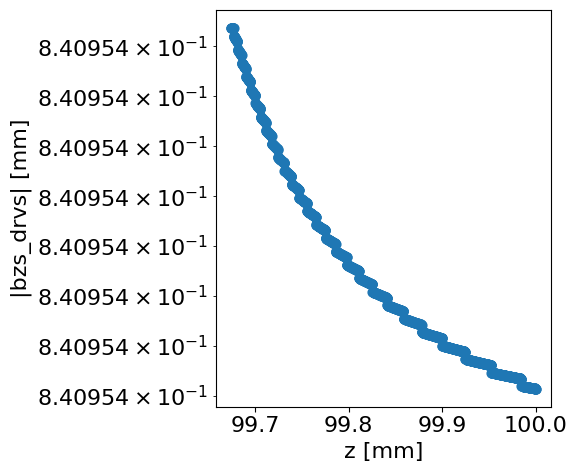

In [19]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs,bzs,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"bzs [mm]")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()


fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs_drv,np.abs(bzs_drv),s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"|bzs_drvs| [mm]")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()